# 6. Credit Risk Prediction

This notebook contains lesson content completed for module 6 of the machine learning zoomcamp.

This is a binary classification problem where customers either default (1) or not (0). 

We will be using this dataset to learn about how decision trees and other ensemble models work and how to tune such models.

Dataset: [Credit Scoring Dataset](https://github.com/gastonstat/CreditScoring)

In [2]:
# Main Imports
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data Cleaning and preparation



In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [4]:
# !wget $data

In [5]:
df = pd.read_csv("./assets/CreditScoring.csv")

In [6]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
status_values = {1: 'ok', 2: 'default', 0: 'unk'}

df.status = df.status.map(status_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [11]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [12]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


### Missing values

In this dataset we are aware that missing values have been replaced with 99999999, so we need to replace them with NaNs.

There is also one unknown value in the target column so we will handle this by removing that row.

In [13]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [14]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [15]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [16]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [17]:
df[df.status != 'unk'].reset_index(drop=True)


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


### Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [20]:
df_full_train.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,6,other,30,22,single,no,fixed,35,73.0,0.0,0.0,1086,1086
1,ok,45,owner,30,64,married,no,freelance,45,157.0,20000.0,0.0,1000,1588
2,ok,2,owner,60,30,married,yes,fixed,45,174.0,4000.0,0.0,2000,2250
3,ok,11,rent,60,28,married,no,fixed,59,144.0,0.0,0.0,1225,1360
4,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
3560,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
3561,default,24,other,60,41,married,yes,freelance,75,0.0,0.0,0.0,2200,2428
3562,default,2,rent,48,56,single,no,freelance,51,157.0,11000.0,4500.0,1000,2008


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [23]:
del df_train['status']
del df_val['status']
del df_test['status']

## 6.3 Decision Trees 

Here is an example of a decision tree we can create as a function of if and else statements:
![Decision Tree Example](./assets/dt_example.png)

In [24]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'
        


In [25]:
xi = df_train.iloc[0].to_dict()

In [26]:
assess_risk(xi)

'ok'

Now we have an understanding of the basics of how decision trees work, we can implement one using scikit learn

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [28]:
# First we need to create dictionaries for the feature matrix
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [29]:
# Then vectorise those dictionaries (equivalent to one hot encoding)
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [30]:
#Instantiate the decisiontree classifier and train it
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Testing on validation data

In [31]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [32]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [33]:
roc_auc_score(y_val, y_pred)

0.6778730268606534

This isn't a very good roc auc score. Let's see  what it was for the training set.

In [34]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

The auc is perfect at  1.0. This tells us that the model has overfit to the training data, which is why it does not predict well on the validation data in comparison to the training set.

Depth of the tree impacts the ability of the model to generalise. If we don't restrict the model will go as deep as it needs to to learn the patterns of the data, and so when presented with new data, it will struggle to predict.

Lets now retrain the model with a max depth of 3.

In [35]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [37]:
roc_auc_score(y_val, y_pred)

0.763427236430611

Still not the best but a much better performance on validation data.

In [38]:
from sklearn.tree import export_text, plot_tree

In [39]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1



[Text(0.5, 0.875, 'records=no <= 0.5\ngini = 0.397\nsamples = 2673\nvalue = [1942.0, 731.0]'),
 Text(0.25, 0.625, 'seniority <= 6.5\ngini = 0.49\nsamples = 457\nvalue = [197, 260]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'income <= 50.5\ngini = 0.423\nsamples = 263\nvalue = [80, 183]'),
 Text(0.0625, 0.125, 'gini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(0.1875, 0.125, 'gini = 0.458\nsamples = 208\nvalue = [74, 134]'),
 Text(0.375, 0.375, 'income <= 99.5\ngini = 0.479\nsamples = 194\nvalue = [117, 77]'),
 Text(0.3125, 0.125, 'gini = 0.452\nsamples = 55\nvalue = [19, 36]'),
 Text(0.4375, 0.125, 'gini = 0.416\nsamples = 139\nvalue = [98.0, 41.0]'),
 Text(0.75, 0.625, 'job=partime <= 0.5\ngini = 0.335\nsamples = 2216\nvalue = [1745, 471]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'income <= 73.5\ngini = 0.284\nsamples = 1993\nvalue = [1651, 342]'),
 Text(0.5625, 0.125, 'gini = 0.474\nsamples = 373\nvalue = [229, 144]'),
 Text(0.6875, 0.125, 'gini = 0.215\nsamp

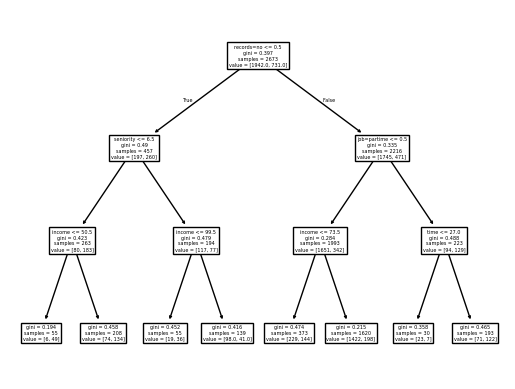

In [40]:
plot_tree(dt,feature_names=dv.get_feature_names_out(), )

## 6.4 Decision Tree Learning Algorithm

In [41]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


How do we find the best split?

When we have numerical colmuns we need numerical threshold to base rules on. At a feature node we need to decide what is true and what is false.

To do this we will test different thresholds to see which gives the best gini index.

In [43]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [67]:
impurity_scores = {}
for T in Ts:

    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    left_impurity = 1 - df_left.status.value_counts(normalize=True).max()
    print(left_impurity)
    display(df_right)
    right_impurity = 1 - df_right.status.value_counts(normalize=True).max()
    print(right_impurity)
    avg_imp = np.mean([left_impurity,right_impurity])
    print(np.round(avg_imp, 2))
    impurity_scores[T] = avg_imp
    print()

,assets,status
2,0,default


0.0


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


0.4285714285714286
0.21



,assets,status
1,2000,default
2,0,default


0.0


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


0.33333333333333337
0.17



,assets,status
1,2000,default
2,0,default
7,3000,default


0.0


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


0.19999999999999996
0.1



,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


0.25


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


0.25
0.25



,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


0.5


,assets,status
0,8000,default
6,9000,ok


0.5
0.5



,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


0.4285714285714286


,assets,status
6,9000,ok


0.0
0.21



In [68]:
impurity_scores

{0: np.float64(0.2142857142857143),
 2000: np.float64(0.16666666666666669),
 3000: np.float64(0.09999999999999998),
 4000: np.float64(0.25),
 5000: np.float64(0.5),
 8000: np.float64(0.2142857142857143)}

If we add more than one feature, we do the same and see which results in the lowest impurity and that will be the more important feature. Lets add an example debt feature to the example dataset.

In [69]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [70]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [73]:
features = {}


for feature, Ts in thresholds.items():
    impurity_scores = {}
    for T in Ts:
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        left_impurity = 1 - df_left.status.value_counts(normalize=True).max()
        print(left_impurity)
        display(df_right)
        right_impurity = 1 - df_right.status.value_counts(normalize=True).max()
        print(right_impurity)
        avg_imp = np.mean([left_impurity,right_impurity])
        print(np.round(avg_imp, 2))
        
        impurity_scores[T] = avg_imp
    features[feature] = impurity_scores
    print()

,assets,debt,status
2,0,1000,default


0.0


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


0.4285714285714286
0.21


,assets,debt,status
1,2000,1000,default
2,0,1000,default


0.0


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


0.33333333333333337
0.17


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


0.0


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


0.19999999999999996
0.1


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


0.25


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


0.25
0.25


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


0.5


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


0.5
0.5


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


0.4285714285714286


,assets,debt,status
6,9000,500,ok


0.0
0.21



,assets,debt,status
6,9000,500,ok


0.0


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


0.4285714285714286
0.21


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


0.33333333333333337


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


0.0
0.17


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


0.4285714285714286


,assets,debt,status
0,8000,3000,default


0.0
0.21



In [74]:
features

{'assets': {0: np.float64(0.2142857142857143),
  2000: np.float64(0.16666666666666669),
  3000: np.float64(0.09999999999999998),
  4000: np.float64(0.25),
  5000: np.float64(0.5),
  8000: np.float64(0.2142857142857143)},
 'debt': {500: np.float64(0.2142857142857143),
  1000: np.float64(0.16666666666666669),
  2000: np.float64(0.2142857142857143)}}

We can see that Assets was still the best column for making decisions better than debt.

After we make the best split we can continue splitting based off new criteria, but we need stopping criteria to stop the tree from over fitting:
- Group is already pure (0 impurity)
- Max depth reached
- Minimum size of group has been reached.


Decision Tree Learning Algoritm

- Find the best split
- Stop if Max depth is reached
- If left is suffciently large and not pure:
    - Repeat for Left
- If right is suffciently large and not pure:
    - Repeat for right


## 6.5 Decision Tree Parameter Tuning

In [108]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
print("Depth -> AUC ")
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(f"{depth} -> {auc:.3f}")

Depth -> AUC 
1 -> 0.613
2 -> 0.688
3 -> 0.763
4 -> 0.779
5 -> 0.784
6 -> 0.773
10 -> 0.712
15 -> 0.675
20 -> 0.666
None -> 0.666


In [109]:
scores = []

depths = [4, 5, 6]
min_samples = [1, 5, 10, 15, 20, 500, 100, 200]
for depth in depths:
    for ms in min_samples:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=ms)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, ms, auc))

In [110]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [111]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
20,6,20,0.801787
19,6,15,0.794948
22,6,100,0.793276
18,6,10,0.790823
23,6,200,0.788792
17,6,5,0.786805
14,5,100,0.786425
9,5,5,0.785915
12,5,20,0.785229
4,4,20,0.783517


In [112]:
df_scores_pivot = df_scores.pivot(index=['min_samples_leaf'], columns=['max_depth'], values=['auc'])

In [113]:
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.779  0.783  0.772
5                 0.779  0.786  0.787
10                0.774  0.783  0.791
15                0.771  0.780  0.795
20                0.784  0.785  0.802
100               0.767  0.786  0.793
200               0.765  0.778  0.789
500               0.671  0.671  0.671

In [114]:
from pypalettes import load_cmap

%matplotlib inline
cmap = load_cmap("X84")
palette = cmap.colors

Text(50.722222222222214, 0.5, 'min_samples_leaf')

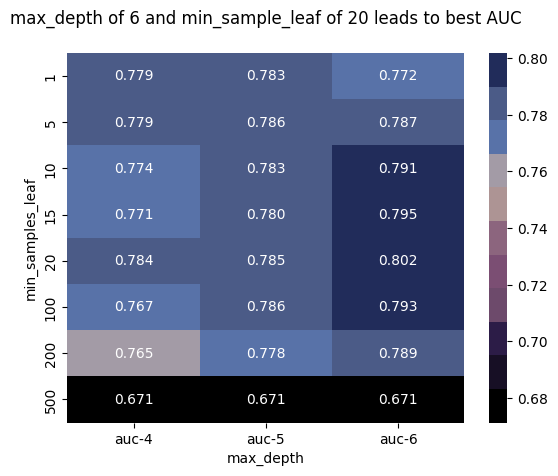

In [115]:
sns.heatmap(df_scores_pivot, annot=True, cmap=palette, fmt=".3f")
plt.title("max_depth of 6 and min_sample_leaf of 20 leads to best AUC\n")
plt.xlabel("max_depth")
plt.ylabel("min_samples_leaf")


Testing with all possible depths:

In [99]:
scores = []

depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
min_samples = [1, 5, 10, 15, 20, 500, 100, 200]

for depth in depths:
    for ms in min_samples:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=ms)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, ms, auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [100]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
76,NaN,20,0.802655
60,15.0,20,0.802207
52,10.0,20,0.800872
44,6.0,20,0.799719
68,20.0,20,0.799689


In [101]:
df_scores_pivot = df_scores.pivot(index=['min_samples_leaf'], columns=['max_depth'], values=['auc'])
df_scores_pivot = df_scores_pivot.round(3)

Text(158.22222222222223, 0.5, 'min_samples_leaf')

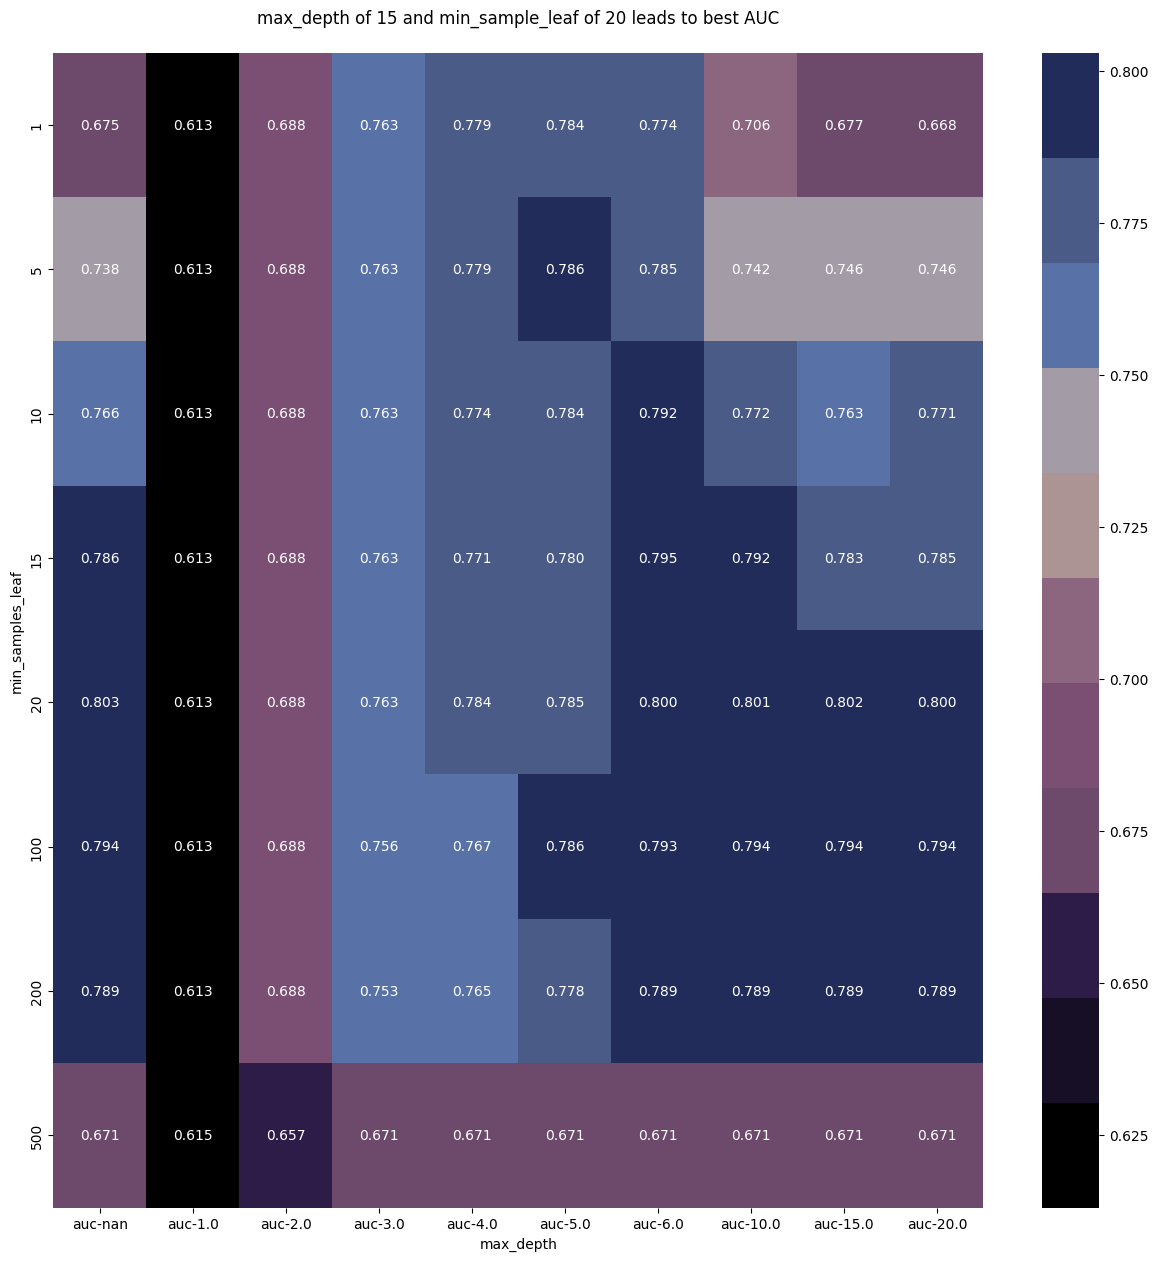

In [107]:
plt.figure(figsize=(15,15))
sns.heatmap(df_scores_pivot, annot=True, cmap=palette, fmt=".3f")
plt.title("max_depth of 15 and min_sample_leaf of 20 leads to best AUC\n")
plt.xlabel("max_depth")
plt.ylabel("min_samples_leaf")

Although the best AUC was with a max depth of 15, we may chose to use a smaller tree to reduce risk of overfitting. But if we plan to use a weak learner in an ensemble this may be less of a consideration.

## 6.6 Ensemble and Random Forest